# Make sure run from ipykernel located in segmenteverygrain

## Run segmentation

Grains are supposed to be well defined in the image; e.g., if a grain consists of only a few pixels, it is unlikely to be detected.

The segmentation can take a few minutes even for medium-sized images, so do not start with large images (downsample them if necessary). Images with ~2000 pixels along their largest dimension are a good start.

Index(['Unnamed: 0', 'area', 'perimeter', 'major_axis_length',
       'minor_axis_length', 'orientation'],
      dtype='object')


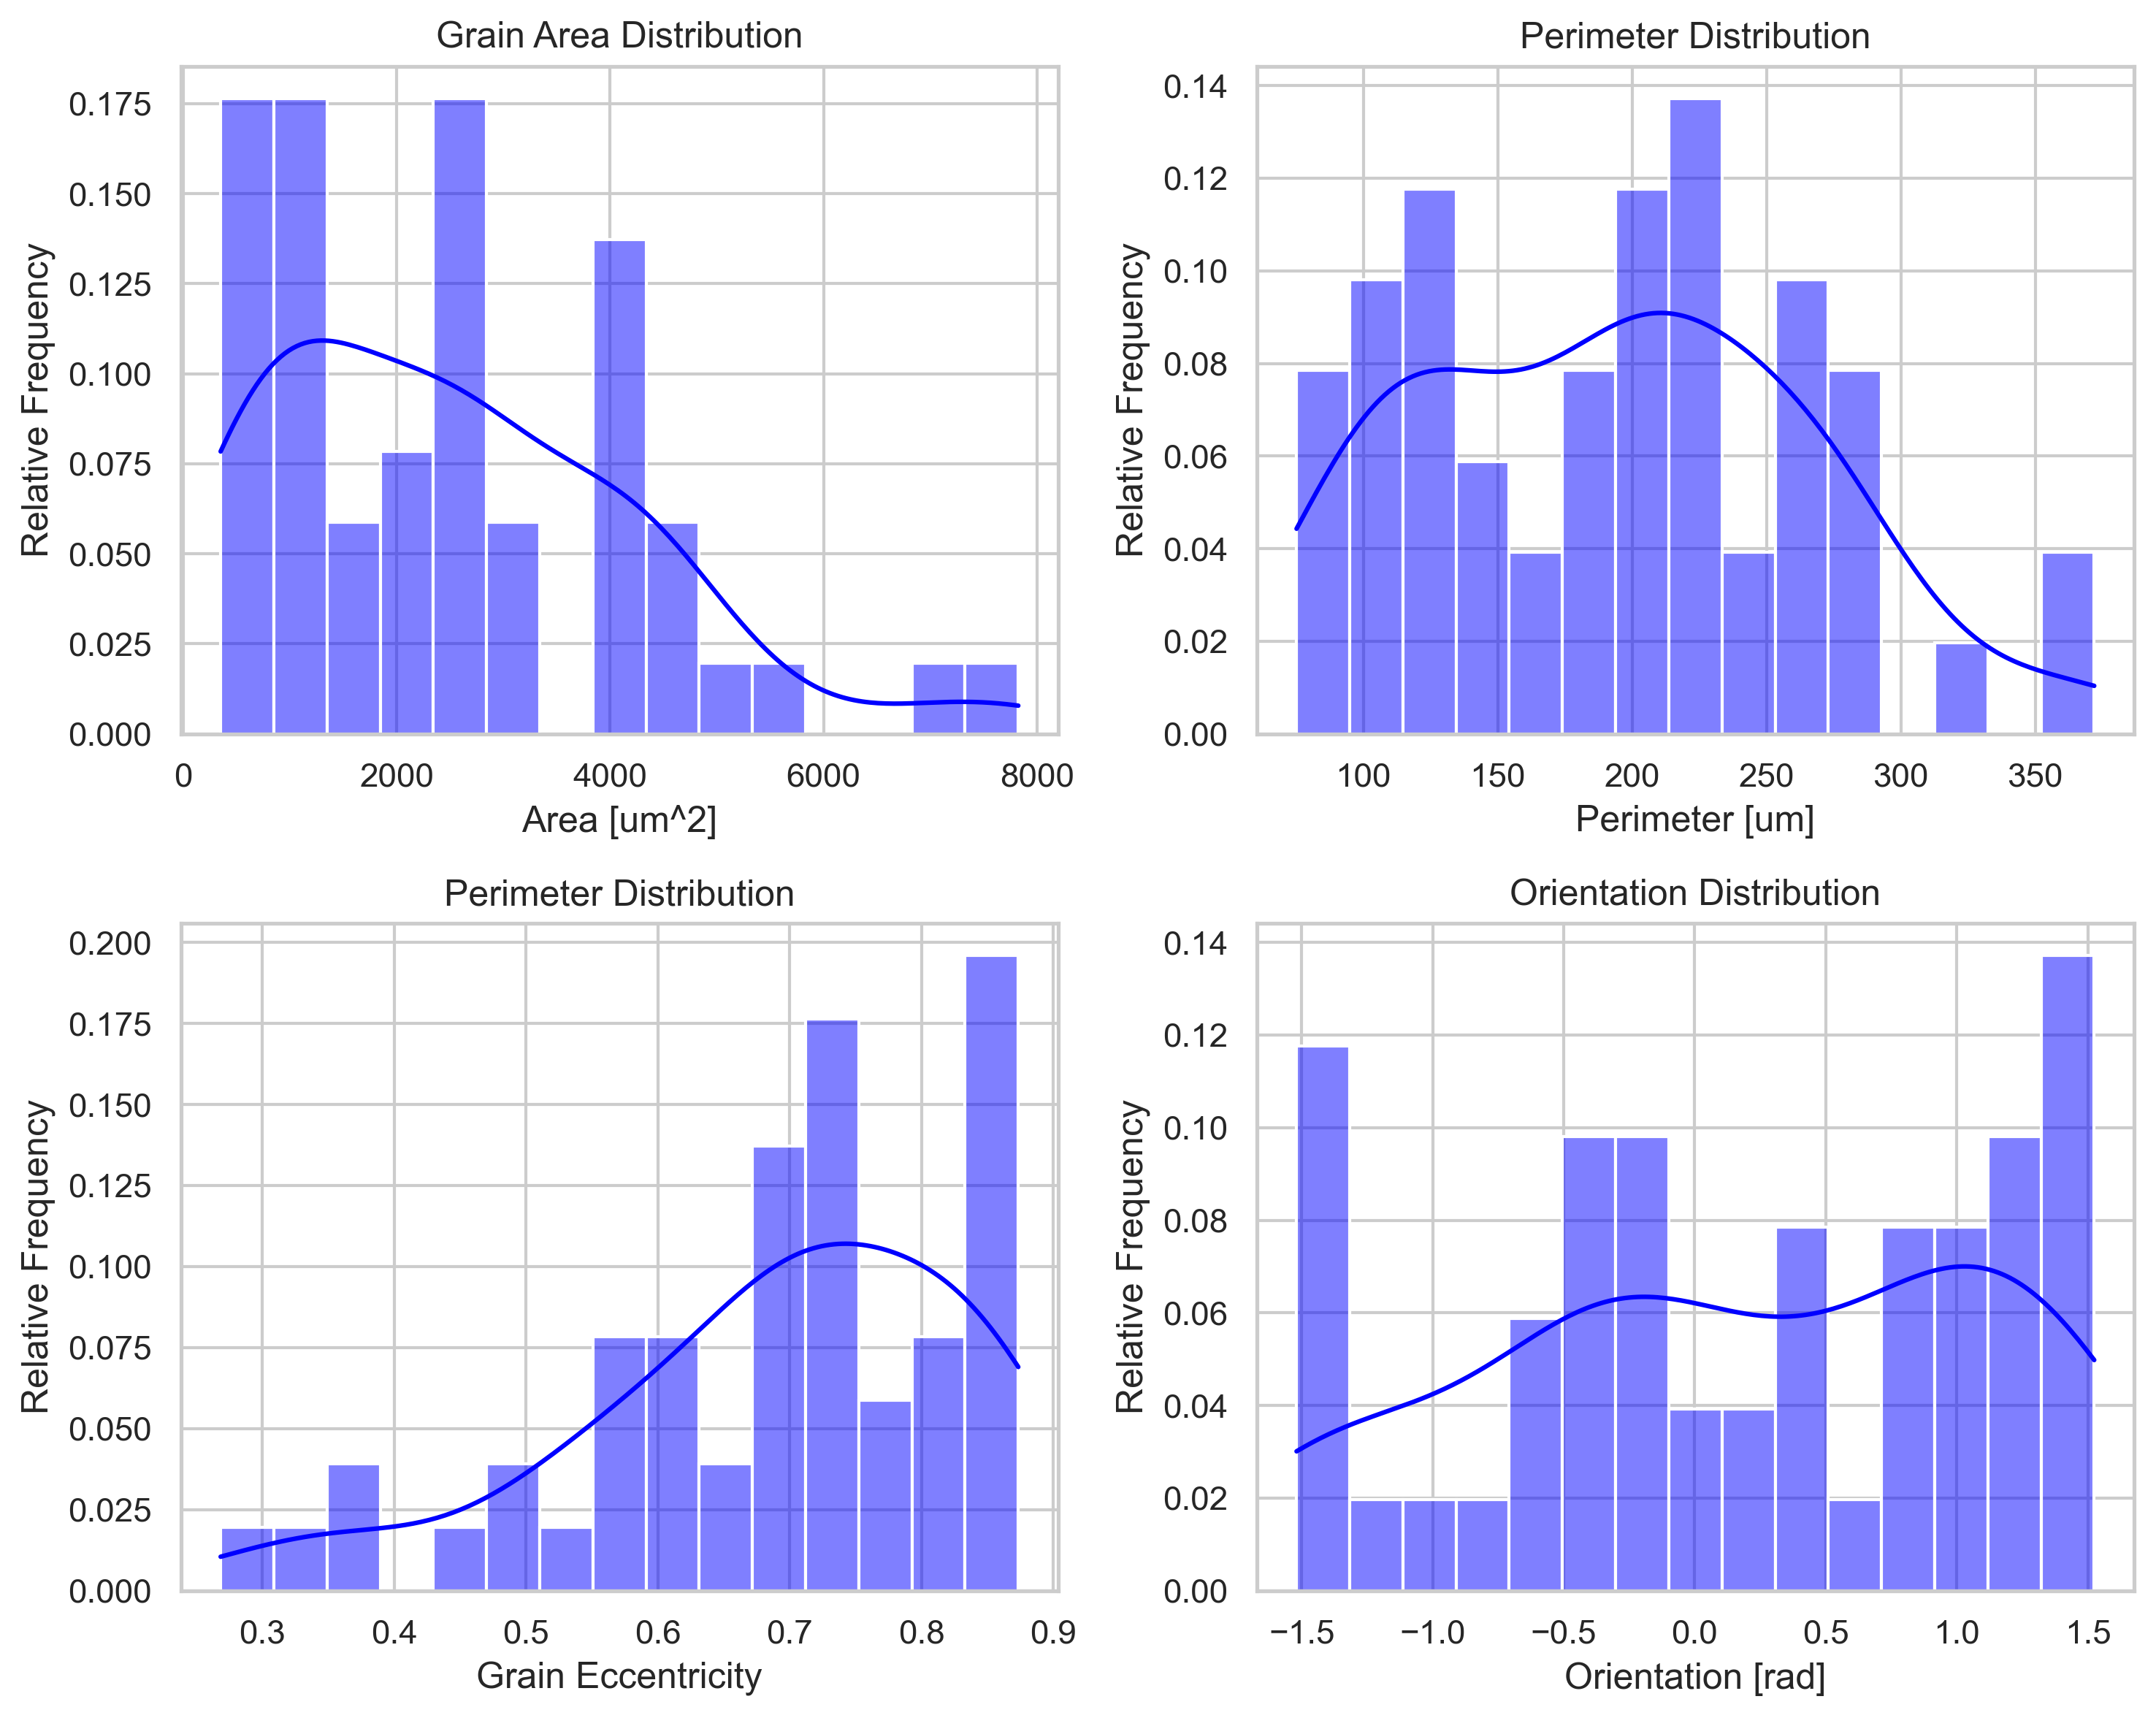

In [29]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

grain_df = pd.read_csv("/Users/pjlohr/Documents/GitHub/segmenteverygrain/perovskite_segmentation/rapid/grain_data/1_m003.csv")
print(grain_df.columns)

unit = 'um'
n_bins = 15

# Create a histogram using Seaborn
sns.set_theme(style="whitegrid")

# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(10, 8), dpi=300)


plt.subplot(2, 2, 1)
sns.histplot(grain_df['area'], bins=n_bins, kde=True, color='blue', stat='probability')
plt.xlabel(f'Area [{unit}^2]')
plt.ylabel('Relative Frequency')
plt.title('Grain Area Distribution')

plt.subplot(2, 2, 2)
sns.histplot(grain_df['perimeter'], bins=n_bins, kde=True, color='blue', stat='probability')
plt.xlabel(f'Perimeter [{unit}]')
plt.ylabel('Relative Frequency')
plt.title('Perimeter Distribution')


# Calculate eccentricity
grain_df['eccentricity'] = np.sqrt(1 - (grain_df['minor_axis_length'] ** 2 / grain_df['major_axis_length'] ** 2))

plt.subplot(2, 2, 3)
sns.histplot(grain_df['eccentricity'], bins=n_bins, kde=True, color='blue', stat='probability')
plt.xlabel(f'Grain Eccentricity')
plt.ylabel('Relative Frequency')
plt.title('Perimeter Distribution')

plt.subplot(2, 2, 4)
sns.histplot(grain_df['orientation'], bins=n_bins, kde=True, color='blue', stat='probability')
plt.xlabel('Orientation [rad]')
plt.ylabel('Relative Frequency')
plt.title('Orientation Distribution')


# Show the plot
plt.tight_layout()
plt.show()


# plt.figure(figsize=(8, 6), dpi=300)
# sns.histplot(grain_df['orientation'], bins=n_bins, kde=True, color='blue', stat='probability')

# # Add labels and title
# plt.xlabel('Orientation [radians]')
# plt.ylabel('Relative Frequency')
# plt.title('Orientation Distribution')

